In [38]:
### import modules
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb



In [50]:
### read data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.info())
print(test_df.info())

print(train_df.head())
print(test_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260753 entries, 0 to 260752
Columns: 299 entries, QuoteNumber to GeographicField64
dtypes: float64(6), int64(265), object(28)
memory usage: 594.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173836 entries, 0 to 173835
Columns: 298 entries, QuoteNumber to GeographicField64
dtypes: float64(6), int64(264), object(28)
memory usage: 395.2+ MB
None
   QuoteNumber Original_Quote_Date  QuoteConversion_Flag Field6  Field7  \
0            1          2013-08-16                     0      B      23   
1            2          2014-04-22                     0      F       7   
2            4          2014-08-25                     0      F       7   
3            6          2013-04-15                     0      J      10   
4            8          2014-01-25                     0      E      23   

   Field8  Field9 Field10  Field11 Field12  ...  GeographicField59A  \
0  0.9403  0.0006     965   1.0200       N  ...                   9 

In [40]:
### drop quote column
train_df = train_df.drop(['QuoteNumber'],axis = 1)


In [41]:
### convert date column to year, month and week
train_df['year'] = train_df['Original_Quote_Date'].apply(lambda x : int(str(x)[:4]))
train_df['month'] = train_df['Original_Quote_Date'].apply(lambda x : int(str(x)[5:7]))
train_df['week']  = train_df['Original_Quote_Date'].apply(lambda x : int(str(x)[8:10]))

### do same for test data
test_df['year'] = test_df['Original_Quote_Date'].apply(lambda x : int(str(x)[:4]))
test_df['month'] = test_df['Original_Quote_Date'].apply(lambda x : int(str(x)[5:7]))
test_df['week']  = test_df['Original_Quote_Date'].apply(lambda x : int(str(x)[8:10]))


### drop the date column as we already have year, month, week
train_df.drop(['Original_Quote_Date'],axis = 1, inplace = True)
test_df.drop(['Original_Quote_Date'],axis = 1, inplace = True)
    

In [42]:
print(train_df.head())
print(test_df.head())

   QuoteConversion_Flag Field6  Field7  Field8  Field9 Field10  Field11  \
0                     0      B      23  0.9403  0.0006     965   1.0200   
1                     0      F       7  1.0006  0.0040     548   1.2433   
2                     0      F       7  1.0006  0.0040     548   1.2433   
3                     0      J      10  0.9769  0.0004   1,165   1.2665   
4                     0      E      23  0.9472  0.0006   1,487   1.3045   

  Field12  CoverageField1A  CoverageField1B  ...  GeographicField60B  \
0       N               17               23  ...                   8   
1       N                6                8  ...                  11   
2       N                7               12  ...                  21   
3       N                3                2  ...                  10   
4       N                8               13  ...                  10   

   GeographicField61A  GeographicField61B  GeographicField62A  \
0                  -1                  18          

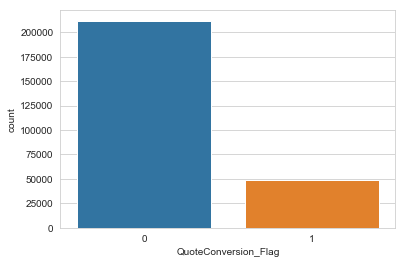

In [43]:
### cusotmera who purchased plan
sns.countplot(x = 'QuoteConversion_Flag', data = train_df)

# we see that no.of people who purcahsed the plan are 25% of who have not purchased


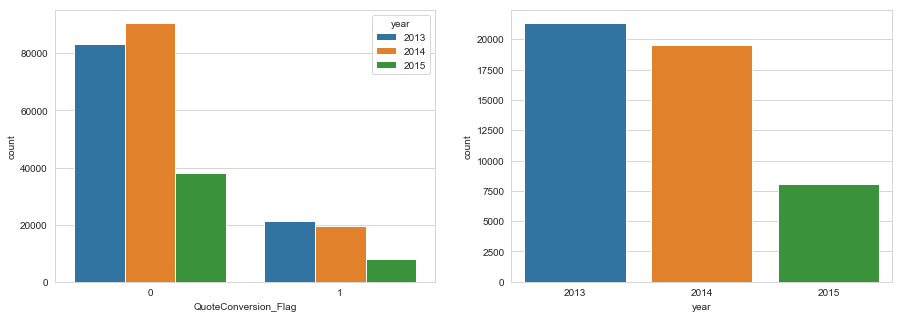

In [44]:
### to check which year has highest num of purchases

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x = 'QuoteConversion_Flag', hue = 'year',data = train_df, ax = ax1)
sns.countplot(x = train_df['year'].loc[train_df['QuoteConversion_Flag']==1], order = [2013,2014,2015], ax = ax2)

# from fig it is evident that no.of purcahse have decreased from 2013-2015 (flag==1), and there is a huge dip in year 2015

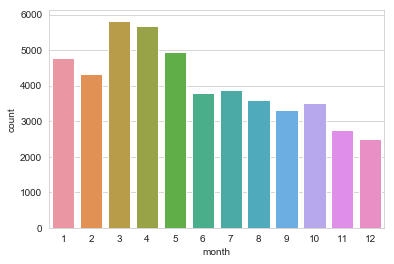

In [45]:
### purcahses month wise 
sns.countplot(x = train_df['month'].loc[train_df['QuoteConversion_Flag']==1],order = [1,2,3,4,5,6,7,8,9,10,11,12])


In [46]:
### fill na values and replace convert non-numeric to label encoding
from sklearn import preprocessing
train_df.fillna(-1,inplace = True)
test_df.fillna(-1,inplace=True)

for i in train_df.columns:
    if train_df[i].dtype=='object':
        label = preprocessing.LabelEncoder()
        label.fit(np.unique(list(train_df[i].values)+list(test_df[i].values)))
        train_df[i] = label.transform(list(train_df[i].values))
        test_df[i] = label.transform(list(test_df[i].values))
        


In [47]:
### train and test sets
X_train = train_df.drop('QuoteConversion_Flag', axis =1)
y_train = train_df['QuoteConversion_Flag']
X_test = test_df.drop('QuoteNumber',axis=1).copy()



In [49]:
### build the model using xgboost
params = {'objective':'binary:logistic'}
xgb_train = xgb.DMatrix(X_train,y_train)
xgb_test = xgb.DMatrix(X_test)

gbm = xgb.train(params,xgb_train,20)


In [64]:
y_pred = gbm.predict(xgb_test)
y_pred[:100]

array([0.00245105, 0.05278962, 0.05419005, 0.02995576, 0.27103174,
       0.04929658, 0.00136799, 0.04854896, 0.00151112, 0.0011424 ,
       0.05729706, 0.22471552, 0.00151112, 0.26667064, 0.10964268,
       0.07636706, 0.00202381, 0.00146573, 0.10669678, 0.09948578,
       0.09550878, 0.17474727, 0.10679758, 0.12246714, 0.661015  ,
       0.5797325 , 0.9934024 , 0.04202881, 0.00136799, 0.04691126,
       0.385158  , 0.17877382, 0.00151112, 0.48531902, 0.00205886,
       0.03643474, 0.34321928, 0.2569052 , 0.02585182, 0.48745596,
       0.87792844, 0.05426774, 0.03103027, 0.00323969, 0.20911673,
       0.09570615, 0.02760759, 0.00151112, 0.99083626, 0.00268052,
       0.27588767, 0.08498015, 0.06545907, 0.08218104, 0.00547024,
       0.23827454, 0.04419059, 0.08103812, 0.00958243, 0.06404086,
       0.00139776, 0.00136799, 0.23833895, 0.00147961, 0.002168  ,
       0.00136799, 0.03982519, 0.09537549, 0.9900686 , 0.04022865,
       0.02145153, 0.2860816 , 0.00136799, 0.01303414, 0.00192